In [1]:
import mne
from pathlib import Path

data_path = Path("../data/raw/P1-20251027T182958Z-1-001/P1/")

file_path = data_path / "binepochs filtered ICArej P1AvgBOS2.set"

epochs = mne.io.read_epochs_eeglab(file_path)

# import os
# from glob import glob

# set_files = sorted(glob(os.path.join(data_path, "*.set")))

# all_epochs = []
# for file in set_files:
#     ep = mne.io.read_epochs_eeglab(file)
#     all_epochs.append(ep)


Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS2.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Rinta\AppData\Local\Temp\ipykernel_12828\4142087294.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(file_path)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_12828\473045128.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  epochs.plot(events=epochs.events, event_id=epochs.event_id, block=True, n_epochs=4, n_channels=4)


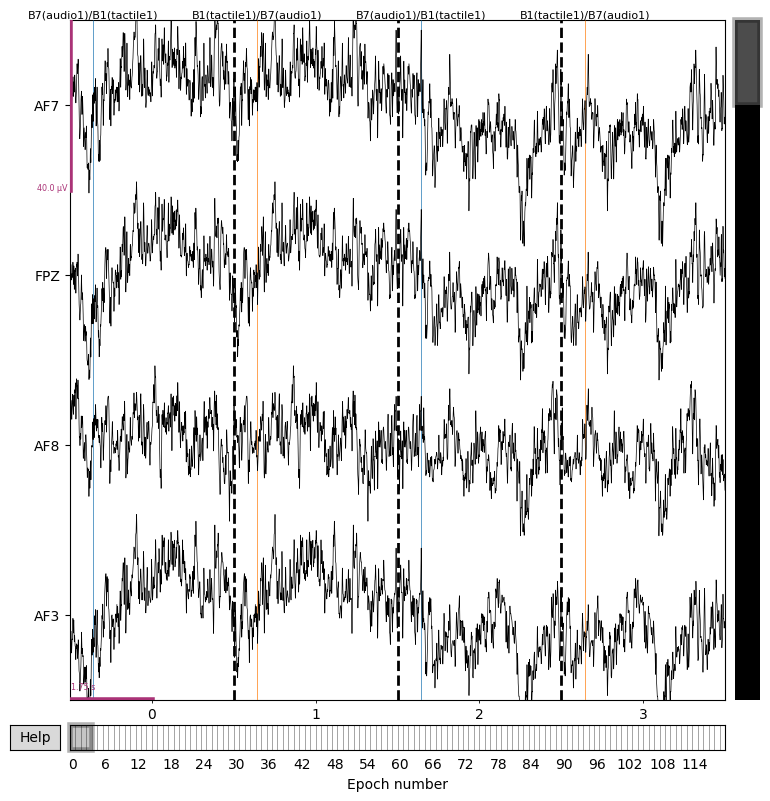

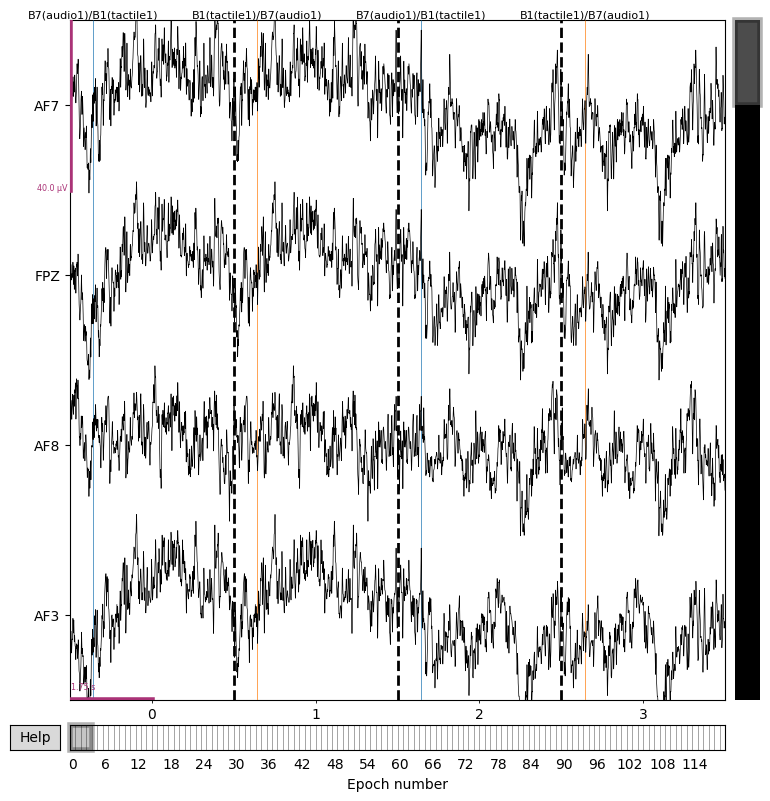

In [58]:
epochs.plot(events=epochs.events, event_id=epochs.event_id, block=True, n_epochs=4, n_channels=4)

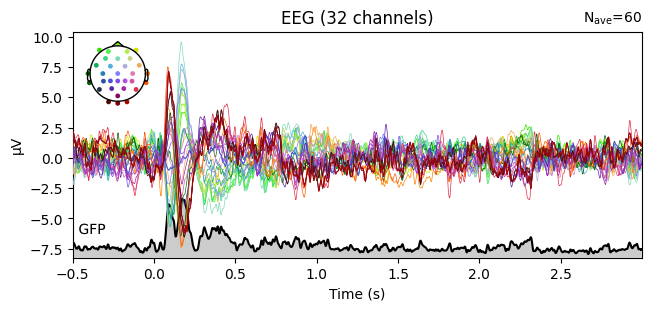

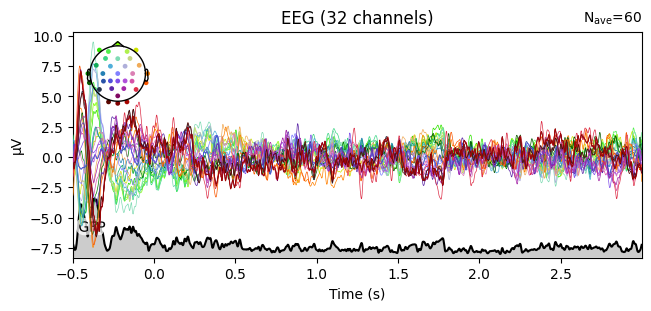

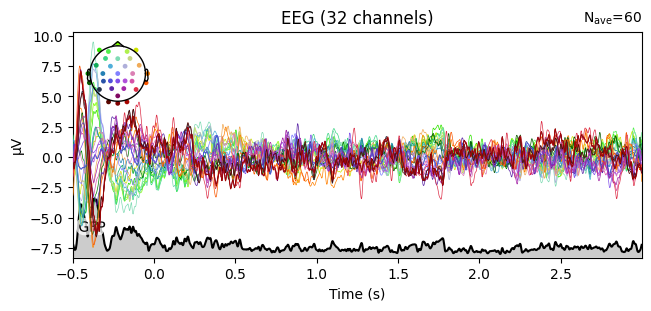

In [3]:
auditory_epochs_all = epochs[::2]
tactile_epochs_all = epochs[1::2]

auditory_avg = auditory_epochs_all.average()
tactile_avg = tactile_epochs_all.average()

auditory_avg.plot(spatial_colors=True, gfp=True)
tactile_avg.plot(spatial_colors=True, gfp=True)


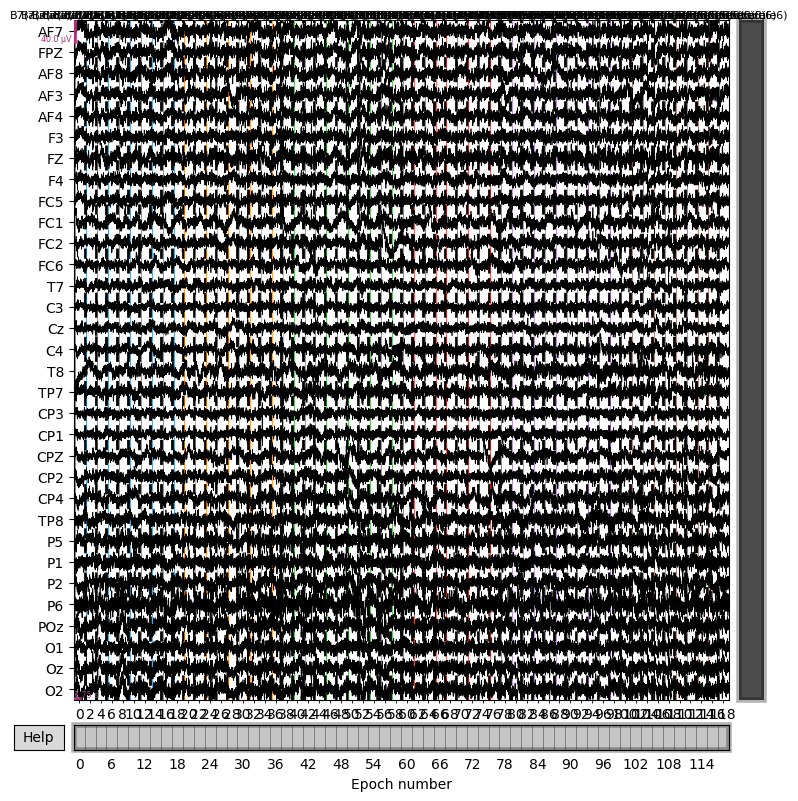

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


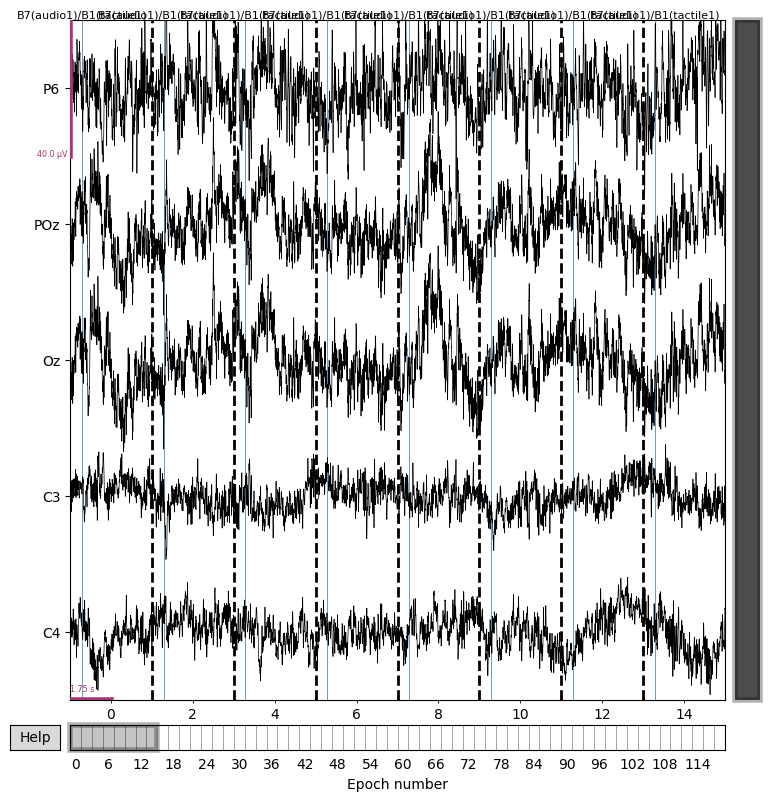

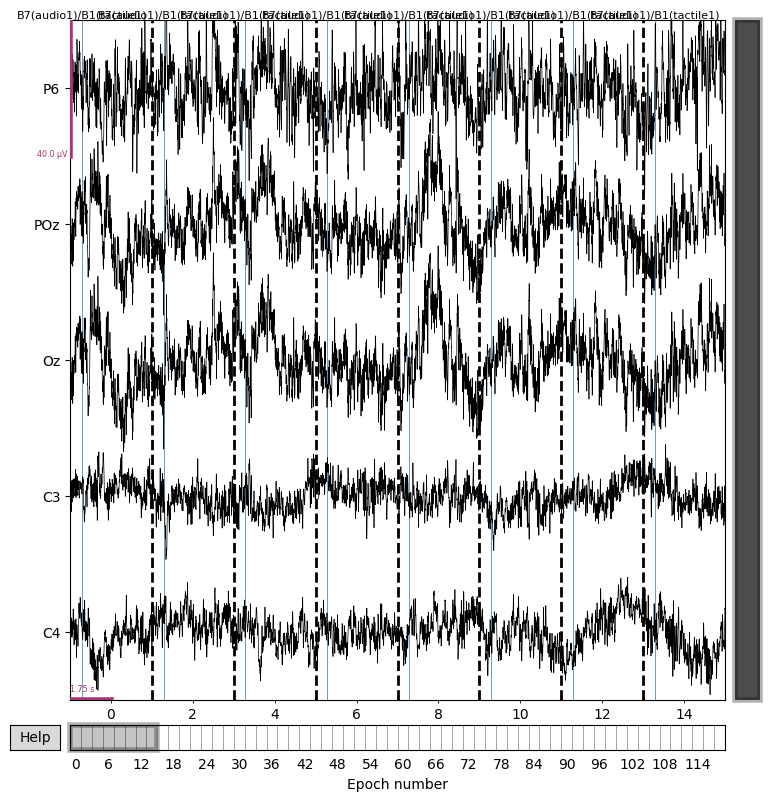

In [74]:
# Visualizing all epochs, and isoloating channels of interest
auditory_epochs_all.plot(events=auditory_epochs_all.events, event_id=auditory_epochs_all.event_id, block=True, n_epochs=60, n_channels=32)
# tactile_epochs_all.plot(events=tactile_epochs_all.events, event_id=tactile_epochs_all.event_id, block=True, n_epochs=6, n_channels=6)
channels_of_interest = ['P6', 'POz', 'Oz', 'C3', 'C4']
auditory_subset = auditory_epochs_all.copy().pick_channels(channels_of_interest)
auditory_subset.plot(events=auditory_subset.events, event_id=auditory_subset.event_id, block=True, n_epochs=8)

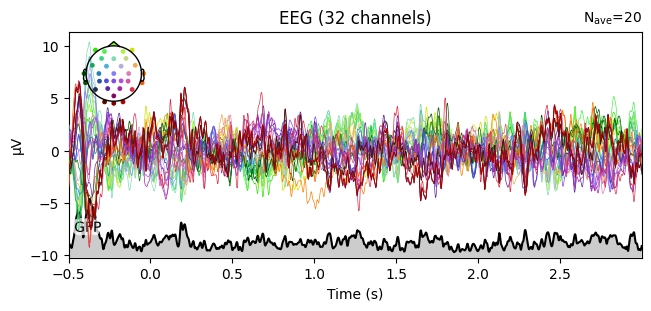

tactile early done


tactile late done


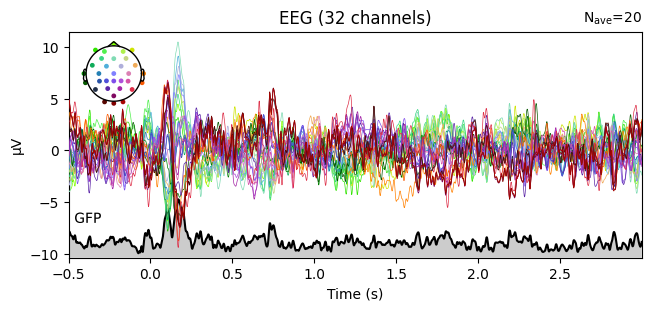

auditory early done


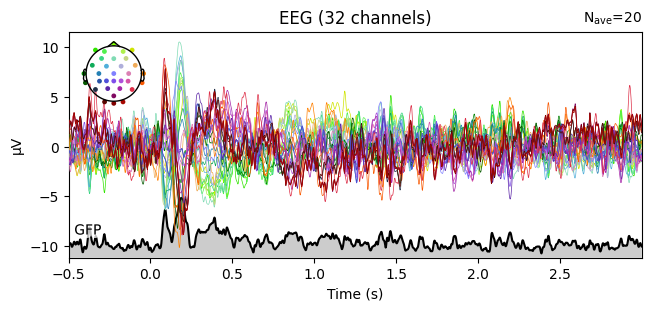

auditory late done


In [4]:

tactile_epochs_early = epochs[1::2][:20]
tactile_avg = tactile_epochs_early.average()
tactile_avg.plot(spatial_colors=True, gfp=True)
print('tactile early done')

tactile_epochs_late = epochs[1::2][-20:]
tactile_avg = tactile_epochs_late.average()
tactile_avg.plot(spatial_colors=True, gfp=True)
print('tactile late done')

auditory_epochs_early = epochs[::2][:20]
auditory_avg = auditory_epochs_early.average()
auditory_avg.plot(spatial_colors=True, gfp=True)
print('auditory early done')

auditory_epochs_late = epochs[::2][-20:]
auditory_avg = auditory_epochs_late.average()
auditory_avg.plot(spatial_colors=True, gfp=True)
print('auditory late done')


In [ ]:
import mne
from pathlib import Path

folder = "data/raw/P1"
subjects = [x for x in range(2, 18) if x not in (4, 14)]  # 2–17, excluding 4 and 14

# --- Containers for all subjects ---
auditory_all, tactile_all = [], []
auditory_early_all, auditory_late_all = [], []
tactile_early_all, tactile_late_all = [], []

for subj_num in subjects:
    filename = f"binepochs filtered ICArej P1AvgBOS{subj_num}.set"
    filepath = Path("../data/raw/P1-20251027T182958Z-1-001/P1/")

    print(f"Loading {filepath}...")

    raw = mne.io.read_epochs_eeglab(filepath / filename)

    # Split by condition
    auditory_epochs_all = epochs[::2]
    tactile_epochs_all = epochs[1::2]

    # Compute averages
    auditory_avg = auditory_epochs_all.average()
    tactile_avg = tactile_epochs_all.average()

    tactile_epochs_early = tactile_epochs_all[:20]
    tactile_epochs_late = tactile_epochs_all[-20:]

    auditory_epochs_early = auditory_epochs_all[:20]
    auditory_epochs_late = auditory_epochs_all[-20:]

    tactile_early_avg = tactile_epochs_early.average()
    tactile_late_avg = tactile_epochs_late.average()
    auditory_early_avg = auditory_epochs_early.average()
    auditory_late_avg = auditory_epochs_late.average()

    # Store
    auditory_all.append(auditory_avg)
    tactile_all.append(tactile_avg)
    auditory_early_all.append(auditory_early_avg)
    auditory_late_all.append(auditory_late_avg)
    tactile_early_all.append(tactile_early_avg)
    tactile_late_all.append(tactile_late_avg)

# --- Compute grand averages ---
auditory_grand = mne.grand_average(auditory_all)
tactile_grand = mne.grand_average(tactile_all)

auditory_early_grand = mne.grand_average(auditory_early_all)
auditory_late_grand = mne.grand_average(auditory_late_all)
tactile_early_grand = mne.grand_average(tactile_early_all)
tactile_late_grand = mne.grand_average(tactile_late_all)

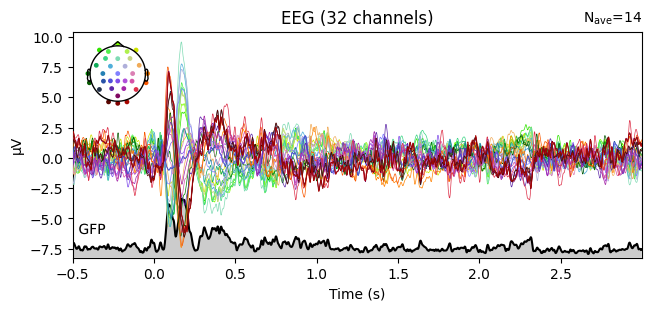

Auditory grand average plotted.


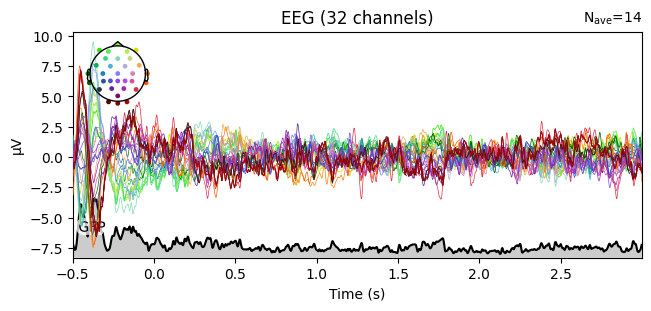

Tactile grand average plotted.


Auditory early grand average plotted.


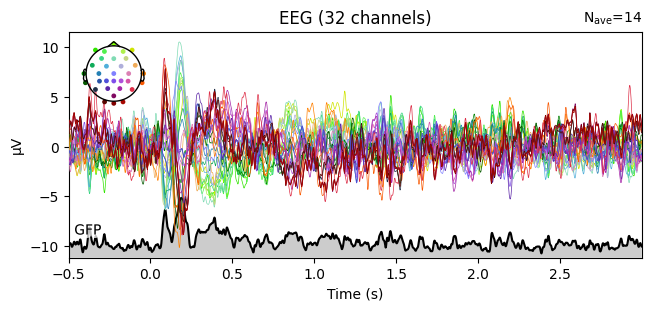

Auditory late grand average plotted.


Tactile early grand average plotted.


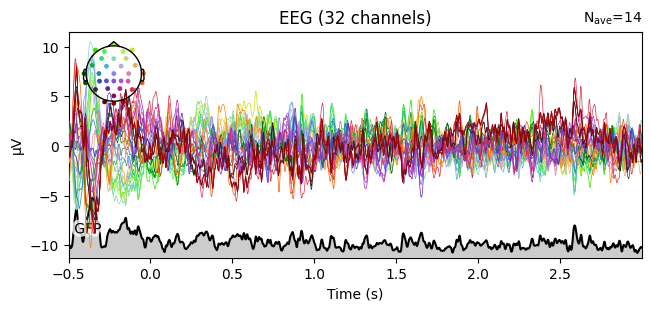

Tactile late grand average plotted.
✅ Grand averages computed and plotted successfully.


In [34]:
# --- Visualization ---
auditory_grand.plot(spatial_colors=True, gfp=True)
print("Auditory grand average plotted.")
tactile_grand.plot(spatial_colors=True, gfp=True)
print("Tactile grand average plotted.")

auditory_early_grand.plot(spatial_colors=True, gfp=True)
print("Auditory early grand average plotted.")
auditory_late_grand.plot(spatial_colors=True, gfp=True)
print("Auditory late grand average plotted.")
tactile_early_grand.plot(spatial_colors=True, gfp=True)
print("Tactile early grand average plotted.")
tactile_late_grand.plot(spatial_colors=True, gfp=True)
print("Tactile late grand average plotted.")

print("✅ Grand averages computed and plotted successfully.")

No projector specified for this dataset. Please consider the method self.add_proj.


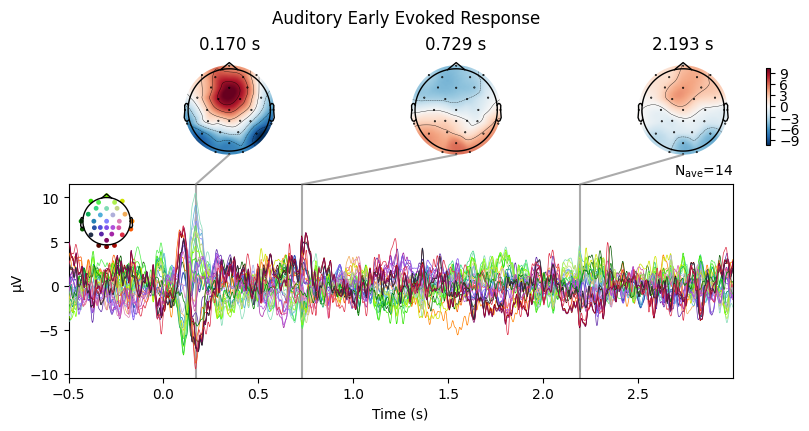

No projector specified for this dataset. Please consider the method self.add_proj.


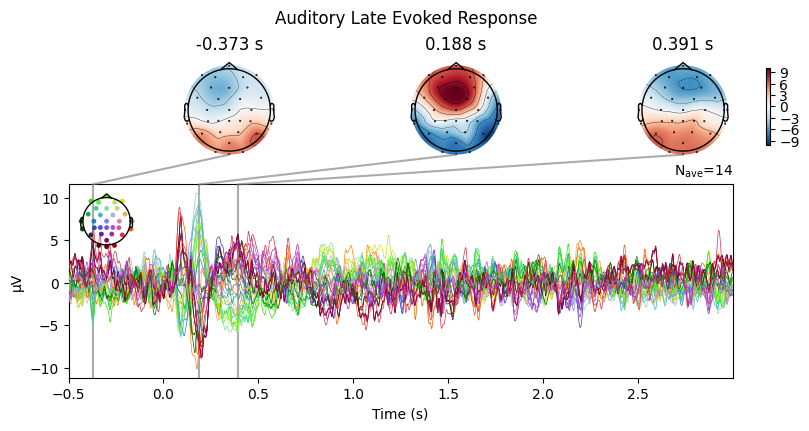

No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


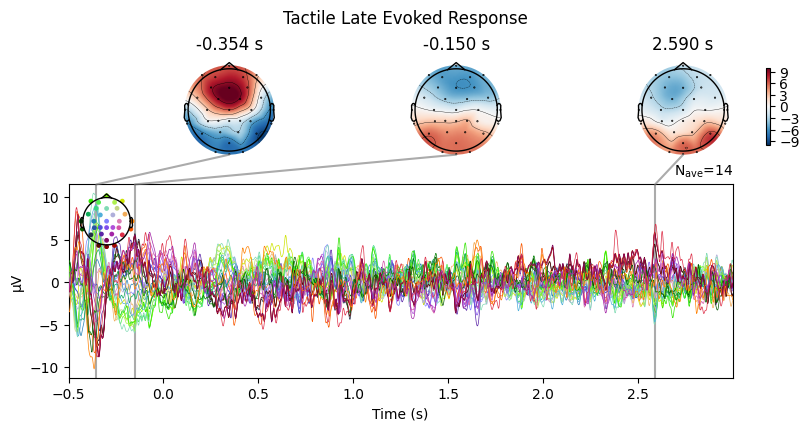

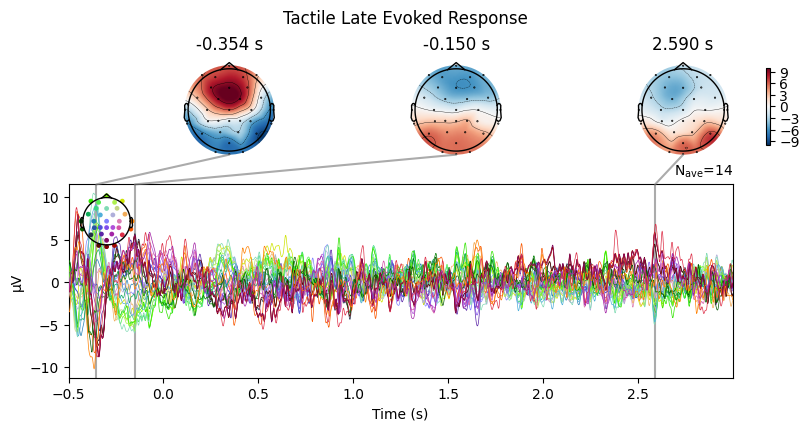

In [41]:
# auditory_grand.plot_joint(title="Auditory Evoked Response")
# tactile_grand.plot_joint(title="Tactile Evoked Response")
auditory_early_grand.plot_joint(title="Auditory Early Evoked Response")
auditory_late_grand.plot_joint(title="Auditory Late Evoked Response")
tactile_early_grand.plot_joint(title="Tactile Early Evoked Response")
tactile_late_grand.plot_joint(title="Tactile Late Evoked Response")

Initial thoughts: looking at tactile early vs. tactile late, there are some noticeable differences. There is more activity immediately following auditory stimulus onset later on compared to earlier (also note that auditory stimulus activity looks the same across both). There is a lot of activity even before the tactile onset in the later trials

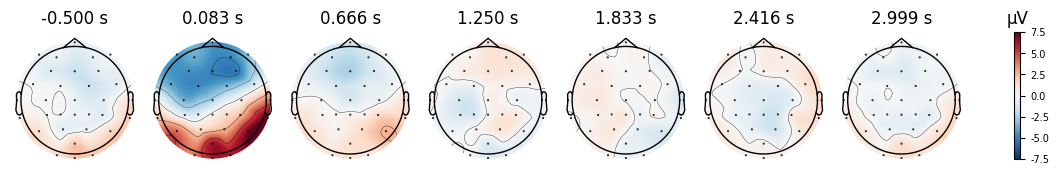

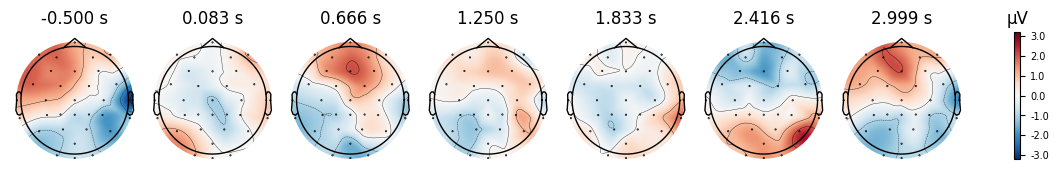

grand topos done


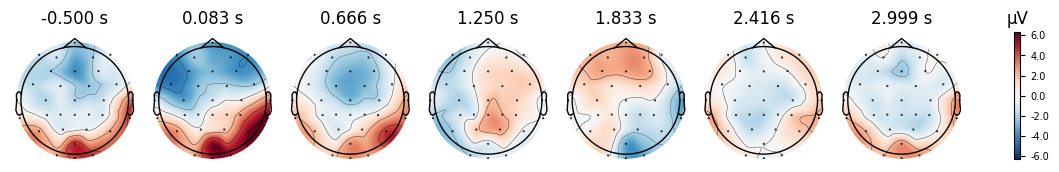

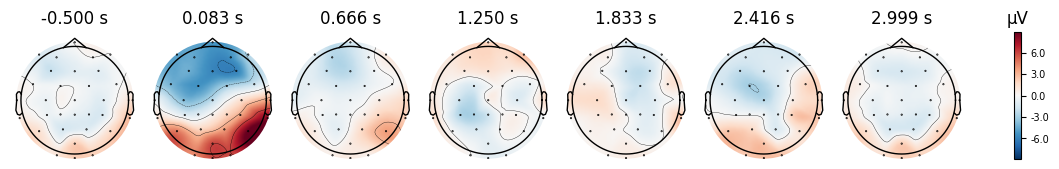

early/late auditory topos done


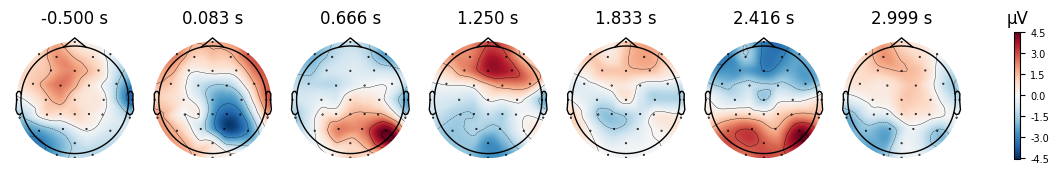

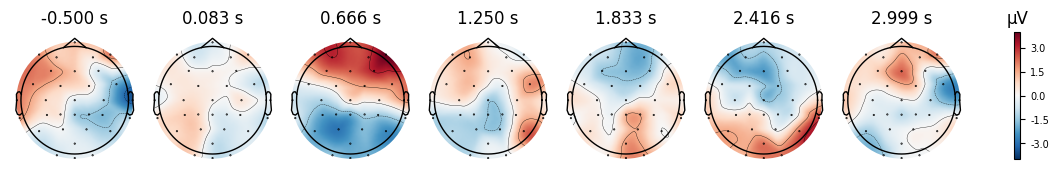

early/late tactile topos done


In [55]:
import numpy as np

aud_times = np.linspace(-0.5, 2.999, 7)
auditory_grand.plot_topomap(times=aud_times, ch_type='eeg')
tactile_grand.plot_topomap(times=aud_times, ch_type='eeg')
print("grand topos done")

auditory_early_grand.plot_topomap(times=aud_times, ch_type='eeg')
auditory_late_grand.plot_topomap(times=aud_times, ch_type='eeg')
print("early/late auditory topos done")

tactile_early_grand.plot_topomap(times=aud_times, ch_type='eeg')
tactile_late_grand.plot_topomap(times=aud_times, ch_type='eeg')
print("early/late tactile topos done")

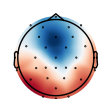

(<matplotlib.image.AxesImage at 0x2883ef62870>, None)

In [ ]:
# Mean absolute amplitude per channel between 100-250 ms
auditory_mean = auditory_grand.copy().crop(0.1, 0.25).data.mean(axis=1)
tactile_mean = tactile_grand.copy().crop(0.1, 0.25).data.mean(axis=1)
diff = tactile_mean - auditory_mean

mne.viz.plot_topomap(diff, auditory_grand.info, cmap='RdBu_r',
                     vlim=(-np.max(np.abs(diff)), np.max(np.abs(diff))),
                     contours=0)

# Extend to first and last 20 epochs

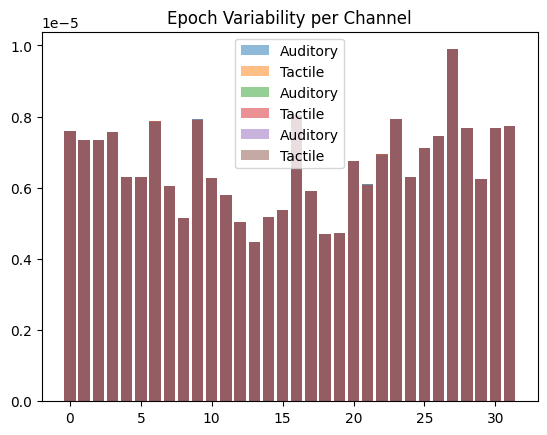

In [ ]:
# Not too sure about this exploratory method
epochs_aud = epochs[::2]
epochs_tac = epochs[1::2]

aud_std = np.std(epochs_aud.get_data(), axis=0).mean(axis=1)
tac_std = np.std(epochs_tac.get_data(), axis=0).mean(axis=1)
plt.bar(range(len(aud_std)), aud_std, alpha=0.5, label="Auditory")
plt.bar(range(len(tac_std)), tac_std, alpha=0.5, label="Tactile")
plt.legend(); plt.title("Epoch Variability per Channel"); plt.show()


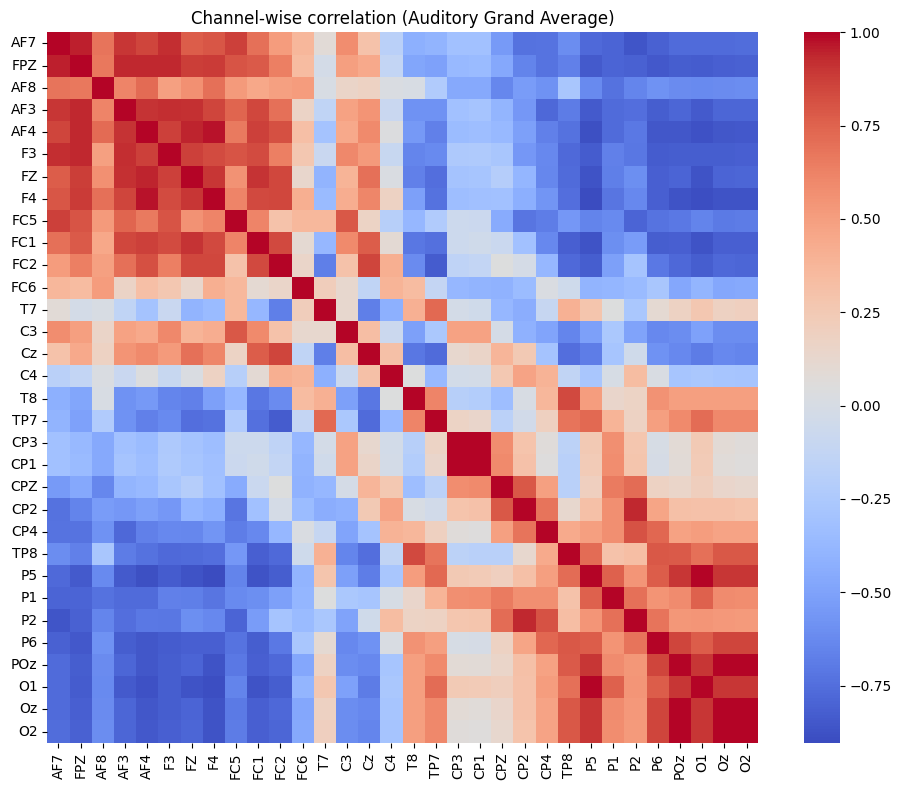

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Extract data (channels × timepoints)
data_aud = auditory_grand.data  # shape (n_channels, n_times)

# Compute channel-by-channel correlation matrix
corrmat_aud = np.corrcoef(data_aud)

# Create a *new* Matplotlib figure explicitly
plt.figure(figsize=(10, 8))
sns.heatmap(
    corrmat_aud,
    xticklabels=epochs.info['ch_names'],
    yticklabels=epochs.info['ch_names'],
    cmap='coolwarm',
    square=True
)
plt.title("Channel-wise correlation (Auditory Grand Average)")
plt.tight_layout()
plt.show()


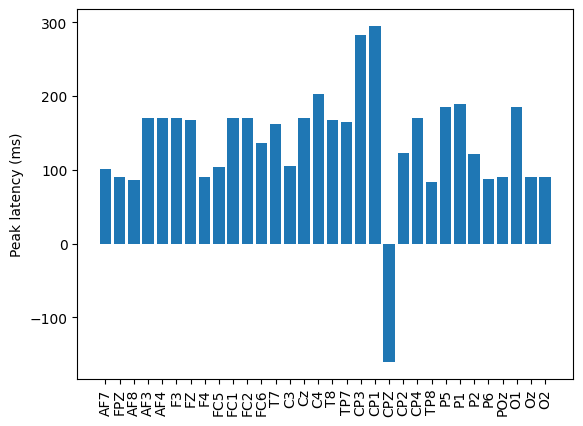

In [32]:
aud_times = auditory_grand.times
aud_peak_times = [aud_times[np.argmax(np.abs(auditory_grand.data[i]))] for i in range(len(ch_names))]
plt.bar(ch_names, np.array(aud_peak_times)*1000)
plt.xticks(rotation=90)
plt.ylabel("Peak latency (ms)")
plt.show()

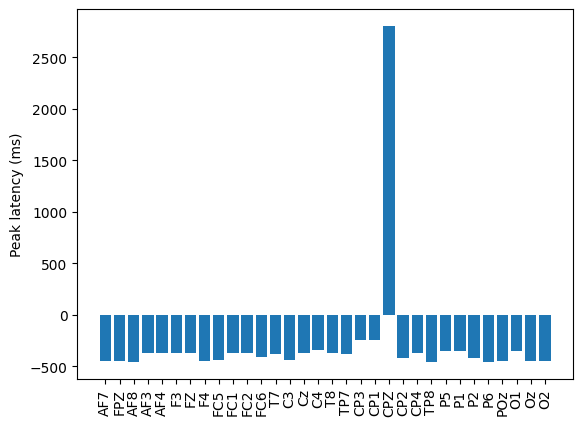

In [26]:
tac_times = tactile_grand.times
tac_peak_times = [tac_times[np.argmax(np.abs(tactile_grand.data[i]))] for i in range(len(ch_names))]
plt.bar(ch_names, np.array(tac_peak_times)*1000)
plt.xticks(rotation=90)
plt.ylabel("Peak latency (ms)")
plt.show()

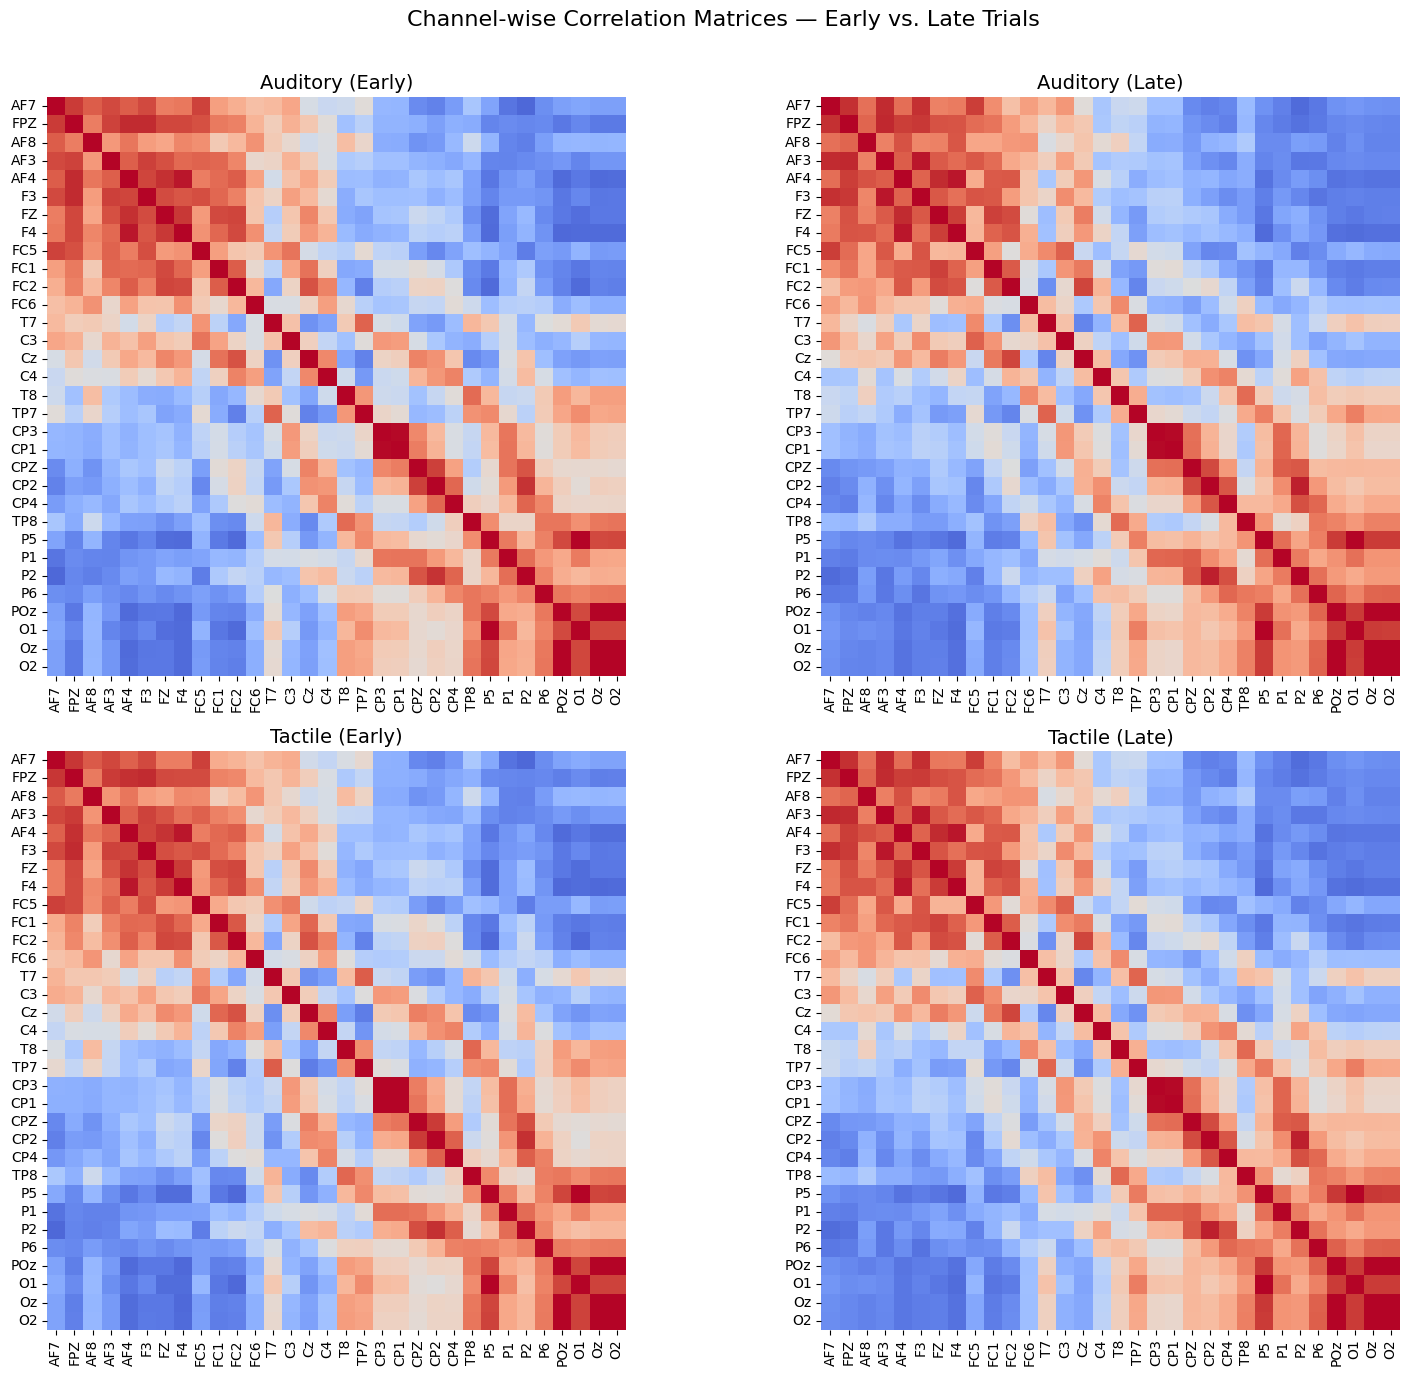

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Close any open MNE figures to avoid backend conflicts
plt.close('all')

# --- Compute correlation matrices ---
def compute_corr(evoked):
    """Compute channel-by-channel correlation matrix for an Evoked object."""
    data = evoked.data  # shape (n_channels, n_times)
    corr = np.corrcoef(data)
    return corr

corr_aud_early = compute_corr(auditory_early_grand)
corr_aud_late = compute_corr(auditory_late_grand)
corr_tac_early = compute_corr(tactile_early_grand)
corr_tac_late = compute_corr(tactile_late_grand)

# --- Plot side-by-side heatmaps ---
ch_names = auditory_early_grand.info['ch_names']
conditions = [
    ("Auditory (Early)", corr_aud_early),
    ("Auditory (Late)", corr_aud_late),
    ("Tactile (Early)", corr_tac_early),
    ("Tactile (Late)", corr_tac_late),
]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, (title, corr) in zip(axes.flatten(), conditions):
    sns.heatmap(
        corr,
        ax=ax,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        xticklabels=ch_names,
        yticklabels=ch_names,
        square=True,
        cbar=False
    )
    ax.set_title(title, fontsize=14)
    ax.set_xticklabels(ch_names, rotation=90)
    ax.set_yticklabels(ch_names, rotation=0)

plt.suptitle("Channel-wise Correlation Matrices — Early vs. Late Trials", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


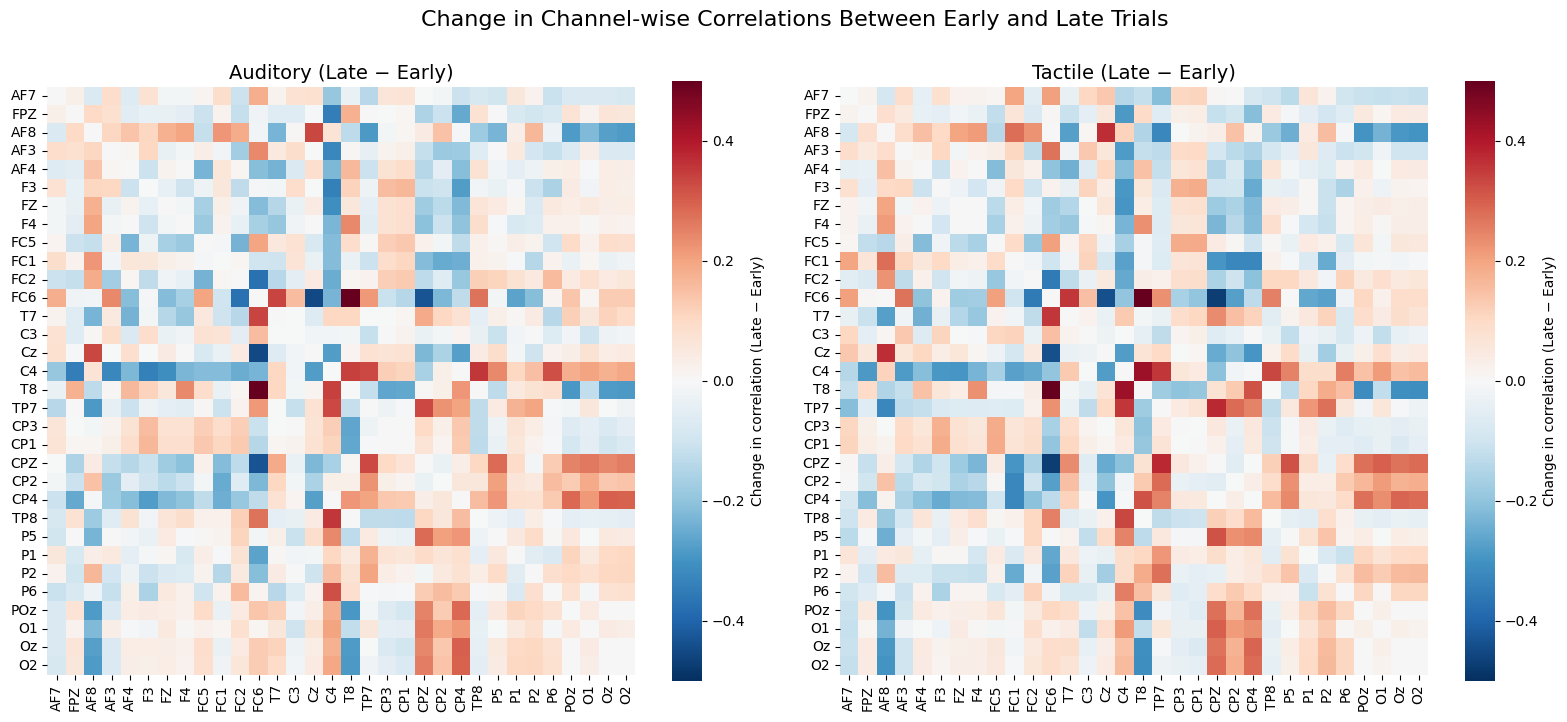

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Compute difference matrices ---
corr_diff_aud = corr_aud_late - corr_aud_early
corr_diff_tac = corr_tac_late - corr_tac_early

# --- Plot the differences ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
ch_names = auditory_early_grand.info['ch_names']

diffs = [
    ("Auditory (Late − Early)", corr_diff_aud),
    ("Tactile (Late − Early)", corr_diff_tac),
]

for ax, (title, corr_diff) in zip(axes, diffs):
    sns.heatmap(
        corr_diff,
        ax=ax,
        cmap="RdBu_r",
        center=0,
        vmin=-0.5, vmax=0.5,
        xticklabels=ch_names,
        yticklabels=ch_names,
        square=True,
        cbar=True,
        cbar_kws={'label': 'Change in correlation (Late − Early)'}
    )
    ax.set_title(title, fontsize=14)
    ax.set_xticklabels(ch_names, rotation=90)
    ax.set_yticklabels(ch_names, rotation=0)

plt.suptitle("Change in Channel-wise Correlations Between Early and Late Trials", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [6]:
# VERY AMBITIOUS MI PAIRWISE CHANNEL ANALYSIS --- IGNORE ---

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tqdm.auto import tqdm
# from sklearn.preprocessing import StandardScaler
# import mne
# from mne.filter import filter_data
# import neural_mi as nmi

# # ---------------- CONFIG ---------------- #
# # Evoked objects you already computed:
# # auditory_grand, tactile_grand  <-- mne.Evoked objects

# # Channel list (32 channels you provided)
# ch_names = [
#     "AF7","FPZ","AF8","AF3","AF4","F3","FZ","F4","FC5","FC1","FC2","FC6",
#     "T7","C3","Cz","C4","T8","TP7","CP3","CP1","CPZ","CP2","CP4","TP8",
#     "P5","P1","P2","P6","POz","O1","Oz","O2"
# ]

# BANDPASS = (1.0, 30.0)      # Hz band-pass for filtering (you can set to None to skip)
# LAG_MS = np.arange(450, 750, 12)  # lags in milliseconds to sweep (e.g. -200 .. +1000 ms)
# SFREQ = auditory_grand.info['sfreq']  # sampling frequency (assumes same for both Evokeds)
# LAG_SAMPLES = np.unique(np.round(LAG_MS / 1000.0 * SFREQ).astype(int))
# N_WORKERS = 4  # start conservatively for RTX 3060; increase if tested
# BASE_PARAMS = {
#     'embedding_dim': 16,
#     'hidden_dim': 32,
#     'n_layers': 2,
#     'learning_rate': 1e-3,
#     'batch_size': 128,
#     'n_epochs': 30,
#     'patience': 15,
# }
# # ---------------------------------------- #

# # Ensure channel ordering matches provided list; if not, pick common channels
# def align_and_get_data(evoked, desired_chs):
#     # evoked.data shape: (n_channels, n_times)
#     present = [ch for ch in desired_chs if ch in evoked.ch_names]
#     if len(present) == 0:
#         raise RuntimeError("No matching channels found in Evoked.")
#     evoked_picked = evoked.copy().pick_channels(present)
#     data = evoked_picked.data  # (n_channels_present, n_times)
#     return present, data

# aud_chs, aud_data = align_and_get_data(auditory_grand, ch_names)
# tac_chs, tac_data = align_and_get_data(tactile_grand, ch_names)

# # Use the intersection ordering (ensures both matrices have same ordering)
# if aud_chs != tac_chs:
#     # pick common in the same order as ch_names
#     common = [ch for ch in ch_names if (ch in aud_chs and ch in tac_chs)]
#     aud_idx = [aud_chs.index(ch) for ch in common]
#     tac_idx = [tac_chs.index(ch) for ch in common]
#     aud_data = aud_data[aud_idx, :]
#     tac_data = tac_data[tac_idx, :]
#     ch_names_used = common
# else:
#     ch_names_used = aud_chs

# n_ch = len(ch_names_used)
# print(f"Using {n_ch} channels: {ch_names_used}")

# # Optional: filter each channel time series (filter_data expects shape (n_signals, n_times))
# if BANDPASS is not None:
#     low, high = BANDPASS
#     aud_data = filter_data(aud_data, sfreq=SFREQ, l_freq=low, h_freq=high, verbose=False)
#     tac_data = filter_data(tac_data, sfreq=SFREQ, l_freq=low, h_freq=high, verbose=False)

# # Z-score each channel (across time) — scale to mean=0, std=1
# scaler = StandardScaler()
# aud_data_z = scaler.fit_transform(aud_data.T).T  # back to (n_ch, n_times)
# tac_data_z = scaler.fit_transform(tac_data.T).T

# # For NeuralMI we will pass 2D arrays shaped (1, n_times) for each channel (one "epoch")
# def prepare_for_nmi(channel_series):
#     # channel_series: 1D array length n_times
#     return channel_series.reshape(1, -1)

# # Prepare output matrices
# aud_max_mi = np.zeros((n_ch, n_ch))
# aud_opt_lag_ms = np.zeros((n_ch, n_ch))
# tac_max_mi = np.zeros((n_ch, n_ch))
# tac_opt_lag_ms = np.zeros((n_ch, n_ch))

# # Helper to extract MI curve from results robustly
# def extract_mi_curve(results):
#     # Common key used earlier by you: results.details['mi_values']
#     d = getattr(results, "details", {}) or {}
#     if 'mi_values' in d:
#         return np.array(d['mi_values'])
#     if 'mi_curve' in d:
#         return np.array(d['mi_curve'])
#     # Last-resort try attributes
#     if hasattr(results, 'mi_estimates'):
#         return np.array(results.mi_estimates)
#     # If cannot find, raise
#     raise KeyError("Could not find MI curve in results.details; inspect `results` object to locate MI values.")

# # Main pairwise loop (upper triangle only)
# pairs = []
# for i in range(n_ch):
#     for j in range(i+1, n_ch):
#         pairs.append((i, j))

# # Use tqdm for progress
# for (i, j) in tqdm(pairs, desc="Computing MI pairs"):
#     # prepare x and y for auditory (1 x n_times)
#     x_a = prepare_for_nmi(aud_data_z[i, :])
#     y_a = prepare_for_nmi(aud_data_z[j, :])

#     # prepare x and y for tactile
#     x_t = prepare_for_nmi(tac_data_z[i, :])
#     y_t = prepare_for_nmi(tac_data_z[j, :])

#     # Run NeuralMI lag for auditory
#     try:
#         res_a = nmi.run(
#             x_data=x_a,
#             y_data=y_a,
#             mode='lag',
#             processor_type_x='continuous',
#             processor_params_x={'window_size': 1},
#             processor_type_y='continuous',
#             processor_params_y={'window_size': 1},
#             lag_range=LAG_SAMPLES,
#             base_params=BASE_PARAMS,
#             n_workers=N_WORKERS,
#             random_seed=42,
#         )
#         mi_curve_a = extract_mi_curve(res_a)
#     except Exception as e:
#         print(f"Warning: auditory MI failed for pair {(i,j)}: {e}")
#         mi_curve_a = np.zeros_like(LAG_SAMPLES, dtype=float)

#     # Run NeuralMI lag for tactile
#     try:
#         res_t = nmi.run(
#             x_data=x_t,
#             y_data=y_t,
#             mode='lag',
#             processor_type_x='continuous',
#             processor_params_x={'window_size': 1},
#             processor_type_y='continuous',
#             processor_params_y={'window_size': 1},
#             lag_range=LAG_SAMPLES,
#             base_params=BASE_PARAMS,
#             n_workers=N_WORKERS,
#             random_seed=42,
#         )
#         mi_curve_t = extract_mi_curve(res_t)
#     except Exception as e:
#         print(f"Warning: tactile MI failed for pair {(i,j)}: {e}")
#         mi_curve_t = np.zeros_like(LAG_SAMPLES, dtype=float)

#     # Compute peak MI and lag (samples -> ms)
#     if mi_curve_a.size:
#         idx_peak_a = int(np.nanargmax(mi_curve_a))
#         peak_mi_a = float(mi_curve_a[idx_peak_a])
#         peak_lag_samples_a = int(LAG_SAMPLES[idx_peak_a])
#         peak_lag_ms_a = peak_lag_samples_a / SFREQ * 1000.0
#     else:
#         peak_mi_a, peak_lag_ms_a = 0.0, np.nan

#     if mi_curve_t.size:
#         idx_peak_t = int(np.nanargmax(mi_curve_t))
#         peak_mi_t = float(mi_curve_t[idx_peak_t])
#         peak_lag_samples_t = int(LAG_SAMPLES[idx_peak_t])
#         peak_lag_ms_t = peak_lag_samples_t / SFREQ * 1000.0
#     else:
#         peak_mi_t, peak_lag_ms_t = 0.0, np.nan

#     # fill symmetric matrices
#     aud_max_mi[i, j] = aud_max_mi[j, i] = peak_mi_a
#     aud_opt_lag_ms[i, j] = aud_opt_lag_ms[j, i] = peak_lag_ms_a

#     tac_max_mi[i, j] = tac_max_mi[j, i] = peak_mi_t
#     tac_opt_lag_ms[i, j] = tac_opt_lag_ms[j, i] = peak_lag_ms_t

# # Optionally set diagonal to 0 / nan
# np.fill_diagonal(aud_max_mi, 0.0)
# np.fill_diagonal(tac_max_mi, 0.0)
# np.fill_diagonal(aud_opt_lag_ms, 0.0)
# np.fill_diagonal(tac_opt_lag_ms, 0.0)

# # ----------- Visualization (4 heatmaps) -----------
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# cmap = "viridis"

# sns.heatmap(aud_max_mi, xticks=np.arange(n_ch)+0.5, yticks=np.arange(n_ch)+0.5,
#             cmap=cmap, ax=axes[0,0], vmin=None, vmax=None, cbar_kws={'label':'MI (bits)'})
# axes[0,0].set_title("Auditory: Max MI")
# axes[0,0].set_xticks(np.arange(n_ch)+0.5)
# axes[0,0].set_yticks(np.arange(n_ch)+0.5)
# axes[0,0].set_xticklabels(ch_names_used, rotation=90, fontsize=8)
# axes[0,0].set_yticklabels(ch_names_used, rotation=0, fontsize=8)

# sns.heatmap(tac_max_mi, xticks=np.arange(n_ch)+0.5, yticks=np.arange(n_ch)+0.5,
#             cmap=cmap, ax=axes[0,1], vmin=None, vmax=None, cbar_kws={'label':'MI (bits)'})
# axes[0,1].set_title("Tactile: Max MI")
# axes[0,1].set_xticklabels(ch_names_used, rotation=90, fontsize=8)
# axes[0,1].set_yticklabels(ch_names_used, rotation=0, fontsize=8)

# sns.heatmap(aud_opt_lag_ms, xticks=np.arange(n_ch)+0.5, yticks=np.arange(n_ch)+0.5,
#             cmap="coolwarm", ax=axes[1,0], cbar_kws={'label':'Optimal lag (ms)'})
# axes[1,0].set_title("Auditory: Optimal Lag (ms)")
# axes[1,0].set_xticklabels(ch_names_used, rotation=90, fontsize=8)
# axes[1,0].set_yticklabels(ch_names_used, rotation=0, fontsize=8)

# sns.heatmap(tac_opt_lag_ms, xticks=np.arange(n_ch)+0.5, yticks=np.arange(n_ch)+0.5,
#             cmap="coolwarm", ax=axes[1,1], cbar_kws={'label':'Optimal lag (ms)'})
# axes[1,1].set_title("Tactile: Optimal Lag (ms)")
# axes[1,1].set_xticklabels(ch_names_used, rotation=90, fontsize=8)
# axes[1,1].set_yticklabels(ch_names_used, rotation=0, fontsize=8)

# plt.tight_layout()
# plt.show()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using 32 channels: ['AF7', 'FPZ', 'AF8', 'AF3', 'AF4', 'F3', 'FZ', 'F4', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP7', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'POz', 'O1', 'Oz', 'O2']


Computing MI pairs:   0%|          | 0/496 [00:00<?, ?it/s]

2025-10-28 22:33:50 - neural_mi - WARNING - Reproducibility with random_seed is not guaranteed with n_workers > 1.
2025-10-28 22:33:50 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-10-28 22:33:50 - neural_mi - INFO - Preparing 25 tasks for lag analysis.
2025-10-28 22:33:50 - neural_mi - INFO - Starting parameter sweep with 4 workers...


Parameter Sweep Progress:   0%|          | 0/25 [00:00<?, ?task/s]

2025-10-28 22:34:14 - neural_mi - WARNING - Reproducibility with random_seed is not guaranteed with n_workers > 1.
2025-10-28 22:34:14 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-10-28 22:34:14 - neural_mi - INFO - Preparing 25 tasks for lag analysis.
2025-10-28 22:34:14 - neural_mi - INFO - Starting parameter sweep with 4 workers...


Parameter Sweep Progress:   0%|          | 0/25 [00:00<?, ?task/s]

KeyboardInterrupt: 